# Электрическое поле и потенциал точечных зарядов

Перевод и незначительные изменения ноутбука [Electric fields and potentials from point charges](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/resistor_network.ipynb) By Jonas Tjemsland, Andreas Krogen, Håkon Ånes og Jon Andreas Støvneng, [NumPhys Project](https://www.numfys.net)

В этом ноутбуке мы визуализируем электрические поля и потенциалы, создаваемые точечными зарядами. Для визуализации мы будем использовать, в частности, функции `mgrid` в NumPy, а также функции `streamplot` и `contourplot` в Matplotlib.

## Закон Кулона

Согласно закону Кулона, сила взаимодействяия двух неподвижных точеченых зарядов равна


$$\vec F = k_e \frac{q_1q_2}{r^2}\hat r,$$

где $k_e$ — кулоновский коэффициент пропорцинальности, $q_1$ и $q_2$ — величины точечных зарядов, а $r$ — расстояние между ними. Кулоновский коэффициент пропорцинальности часто выражается как $k_e=\frac{1}{4\pi\varepsilon_0}\approx 8.988\cdot 10^9 $ Nm$^2$/C$^2$, где $\varepsilon_0$ – электрическая постоянная (электрическая проницаемость вакуума).

## Электрическое поле

Предположим, что в заданной точке пространства имеется электрически заряженное тело $A$.  Если поместить в точку $P$ тестовый заряд $q_0$, то сможем измерить силу $\vec F_0$, действующую со стороны $A$ на заряд. Если тестовый заряд заменить зарядом $q_1$, то этот новый заряд будет испытывать силу $\frac{\vec F_0}{q_0}q_1$. Это означает, что сила, приложенная к такому испытательному заряду, может рассматриваться как свойство данной точки в пространстве, созданное $A$ . Назовем это *электрическим полем* $\vec E$. Иными словами, **электрическую силу на заряженном теле оказывает электрическое поле, создаваемое *другими* заряженными телами**. Определяим электрическое поле как

$$\vec E = \frac{\vec F_0}{q_0}.$$

Для точечного заряа получим

$$\vec E= k_e \frac{q_1}{r^2}\hat r.$$

## Суперпозиция зарядов

Заметим, кулоновскому закону обладает свойством суперпозиции, а это означает, что сила и электрическое поле двух (или более) точечных зарядов являются суммой силы или электрического поля этих зарядов. Математически мы можем выразить силу, приложенную к заряду $q$ со стороны нескольких зарядов $\{q_i\}$ как

$$\vec F_{tot} = \sum_i \vec F_i = k_eq\sum_i \frac{q_i}{r_i^2}\hat r_i,$$

где $r_i$ – расстояние между зарядами $q$ и $q_i$. Таким же образом мы имеем

$$\vec E = \sum_i\vec E_i=k_e\sum_i \frac{q_i}{r_i^2}\hat r_i.$$

Если перейти от суммы к интегралу, то можно описать непрерывно распределнные заряды, что будет рассмотрено позже.


## Расчет и визуализация элетростатических полей

Часто необходимо визуализировать электрическое поле, обусловленное какой-либо конфигурацией зарядов. Это делается с помощью линий электрического поля, которые показывают направление $\vec E$ в каждой точке. Расстояние между ними может дать общее представление о величине $|\vec E|$. Можно также выразить величину в виде цветов, толщины линий поля или длины стрелок. Линии поля часто трудно или невозможно нарисовать или вычислить точно. Вот тут и пригодится вычислительная физика!

Создадим фрагмент кода, который вычислит и построит график электрического поля вокруг произвольного количества зарядов с произвольным зарядом. Для простоты сделаем это в двух измерениях.

Как всегда, мы начинаем с импорта пакетов и установки общих параметров рисунка.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

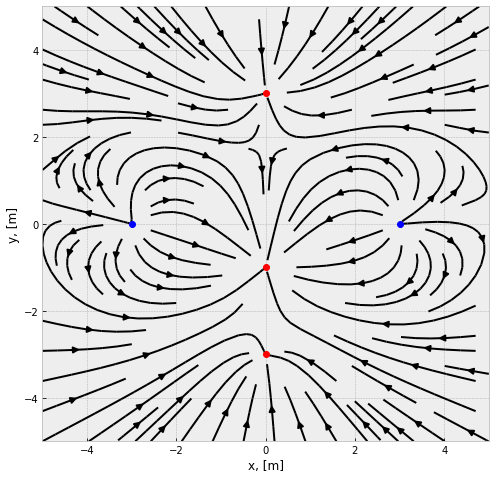

In [88]:
plt.figure(figsize=(8, 8))

# Define two positive and three negative
# charges (x [m], y [m], q [C])
C = [(-3,0,1), (3,0,1), (0,3,-1), (0,-3,-1), (0,-1,-5)] 

[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
plt.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 200j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=1, 
               arrowstyle='simple')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()

Теперь добавим интерактива в полученную картинку. Воспользуеися библиотекой `ipywidgets` для того, чтобы управлять положениями и величиной зарядов при помощи слайдеров.

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [86]:
coordinates_prop = (-4.5,4.5,0.1)
@interact_manual
def plot_charges_field(x1=coordinates_prop,y1=coordinates_prop,
                       x2=coordinates_prop,y2=coordinates_prop,
                       x3=coordinates_prop,y3=coordinates_prop,
                       x4=coordinates_prop,y4=coordinates_prop):
    plt.figure(figsize=(8, 8))

    # Define two positive and three negative
    # charges (x [m], y [m], q [C])
    C = [(x1,y1,1), (x2,y2,1), (x3,y3,-1), (x4,y4,-1)] 

    [xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
    k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

    # Plot the point charges
    for i in range(0, len(C)):
        if C[i][2] > 0:
            color = 'bo'
        elif C[i][2] < 0:
            color = 'ro'
        else:
            color = 'wo'
        plt.plot(C[i][0], C[i][1], color)
    plt.axis([xmin, xmax, ymin, ymax])

    # Calculate the field lines
    n = 200j  # Mesh grid resolution
    Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
    Ex, Ey = np.array(X*0), np.array(Y*0)
    for i in range(0, len(C)):
        R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
        Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
        Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R

    # Plot the result
    plt.streamplot(X, Y, Ex, Ey, color='k', density=1, 
                   arrowstyle='simple')
    plt.xlabel('x, [m]')
    plt.ylabel('y, [m]')
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='x1', max=4.5, min=-4.5), FloatSlider(value=0.0, desc…

## Электроческие потенциалы

Потенциальная энергия $U$, необходимая для передвижения электрического заряда $q_0$ из точки $a$ в точку $b$ в заданном электрическом поле $\vec{E}$ равна

$$U_{ab}=\int_a^b \vec F \cdot \text{d}\vec l = \int_a^bq_0 \vec E\cdot \text d \vec l.$$

Как и ранее, разделим полученное выражение на величину тестового заряда $q_0$ и получим скалярное выражение, не зависящее от величины тестового заряда. Будем это электрическим потенциалом $V$, его изменение определяется по формуле:

$$\Delta V = V_a-V_b = \int_a^b \vec E\cdot \text d\vec l.$$

Зачастую сила на бесконечно большом расстоянии равна нулю, $F_\infty=0$, и поэтому потенциал $V_\infty$ в этом случае часто выбирается в качестве отправной точки и определяется как ноль, $V_\infty\equiv 0$.
Это также дает отношение

$$\vec E = -\nabla V = - \left(\frac{\partial V}{\partial x}, \frac{\partial V}{\partial y}, \frac{\partial V}{\partial z}\right).$$

Это означает, что кривая заданного потенциала $V(x,y,z)=\xi$, так называемая поверхность эквипотенциала, является нормальной к линиям электрического поля. 

В дискретном случае электрический потенциал, обусловленный набором точечных зарядов, задается следующим образом

$$V=\frac{U}{q_0}=k_e\sum_i\frac{q_i}{r_i}.$$

Легче вычислить электрическое поле из потенциала, чем наоборот.

Потенциал можно, например, визуализировать как эквипотенциальные поверхности (или кривые в двух измерениях) разного цвета и/или с заданной разницей потенциалов между каждой поверхностью. Двухмерный потенциал также может быть визуализирован в трех измерениях.

Выполним те же вычисления, что и выше, но на этот раз вычислим электрическое поле из потенциала, $\vec E = -\nabla V$, и построим их вместе.

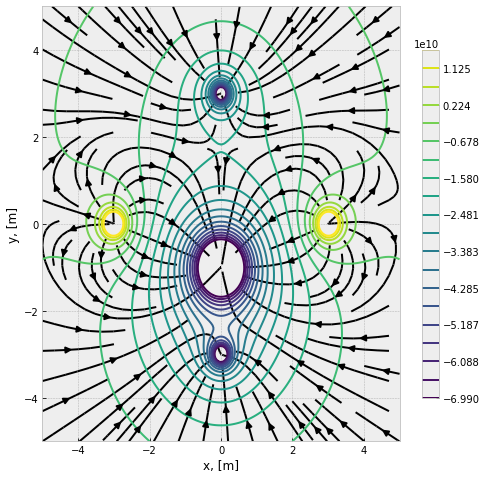

In [89]:
plt.figure(figsize=(8, 8))

V = 0*X

# Calculate the potential
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    V = V + k*C[i][2]/R

# Calculate the electric field from the potential
Ey, Ex = np.gradient(-V)

# The values of the equipotential surfaces. 
# Note that the potential goes to pluss or minus infinite near the point 
# charges. We therefore have to exclude the maximum and minimum values.
equip_surf = np.linspace(np.min(V)*0.05, np.max(V)*0.05, 20)

# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=1, arrowstyle='simple')
contour_surf = plt.contour(X, Y, V, equip_surf)
plt.colorbar(contour_surf, shrink=0.8, extend='both')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()

In [90]:
@interact_manual
def plot_charges_field(x1=coordinates_prop,y1=coordinates_prop,
                       x2=coordinates_prop,y2=coordinates_prop,
                       x3=coordinates_prop,y3=coordinates_prop,
                       x4=coordinates_prop,y4=coordinates_prop):
    plt.figure(figsize=(8, 8))

    # Define two positive and three negative
    # charges (x [m], y [m], q [C])
    C = [(x1,y1,1), (x2,y2,1), (x3,y3,-1), (x4,y4,-1)] 

    [xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
    k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

    V = 0*X

    # Calculate the potential
    for i in range(0, len(C)):
        R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
        V = V + k*C[i][2]/R

    # Calculate the electric field from the potential
    Ey, Ex = np.gradient(-V)

    # The values of the equipotential surfaces. 
    # Note that the potential goes to pluss or minus infinite near the point 
    # charges. We therefore have to exclude the maximum and minimum values.
    equip_surf = np.linspace(np.min(V)*0.05, np.max(V)*0.05, 20)

    # Plot the result
    plt.streamplot(X, Y, Ex, Ey, color='k', density=1, arrowstyle='simple')
    contour_surf = plt.contour(X, Y, V, equip_surf)
    plt.colorbar(contour_surf, shrink=0.8, extend='both')
    plt.xlabel('x, [m]')
    plt.ylabel('y, [m]')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='x1', max=4.5, min=-4.5), FloatSlider(value=0.0, desc…